ASSIGNMENT: E-4

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("dataset.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].unique()

array([1, 0])

In [9]:
corr=df.corr()

<AxesSubplot: >

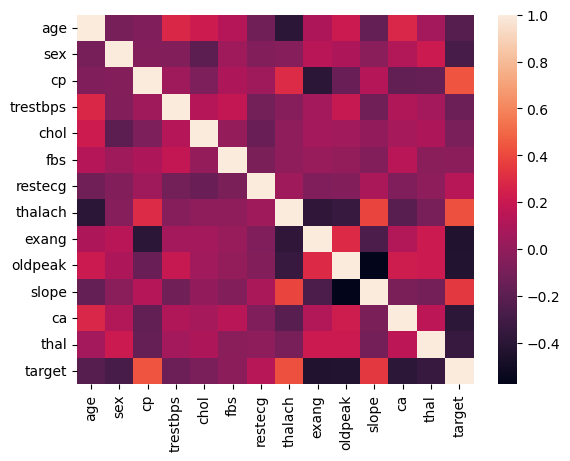

In [10]:
sns.heatmap(corr)

In [11]:
X= df.iloc[:,:-1]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [12]:
y= df.iloc[:,-1]

In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=43)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [20]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [21]:
y_pred = rf.predict(X_test)


In [22]:
print(y_pred)


[0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0
 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))

Accuracy: 86.81%
Precision: 82.76%
Recall: 96.00%
F1 Score: 88.89%


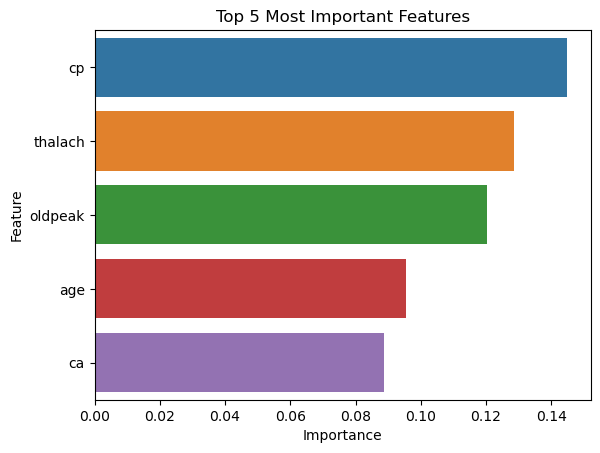

In [25]:
# Get the feature importances
importances = rf.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Get the top 5 most important features
top_features = feature_importances[:5]

# Visualize the top 5 most important features using a bar chart
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 5 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV, KFold

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier object
rf = RandomForestClassifier(random_state=42)

# Create a 5-fold cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Print the accuracy score for the best hyperparameters on the test data
print("Accuracy Score: {:.2f}%".format(grid_search.best_score_ * 100))


Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy Score: 83.95%


In [27]:
# Report the performance metrics for the best hyperparameters on the test data
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("Accuracy Score (Tuned Model): {:.2f}%".format(accuracy_tuned * 100))
print("Precision Score (Tuned Model): {:.2f}%".format(precision_tuned * 100))
print("Recall Score (Tuned Model): {:.2f}%".format(recall_tuned * 100))
print("F1 Score (Tuned Model): {:.2f}%".format(f1_tuned * 100))

Accuracy Score (Tuned Model): 83.52%
Precision Score (Tuned Model): 79.66%
Recall Score (Tuned Model): 94.00%
F1 Score (Tuned Model): 86.24%


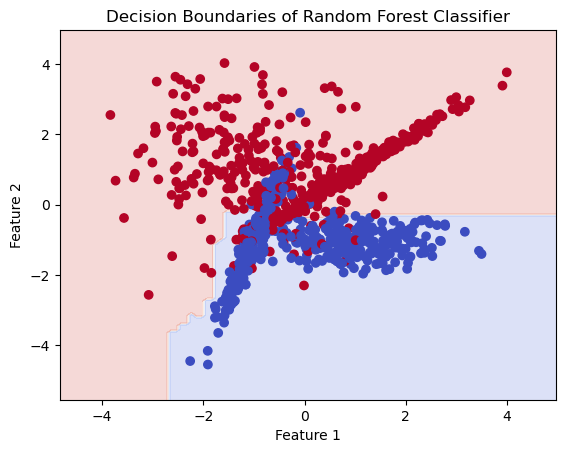

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Create a toy dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Train a random forest classifier with 100 trees and a maximum depth of 5
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X, y)

# Get the minimum and maximum values of the two features
feature1_min, feature1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
feature2_min, feature2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generate a grid of points within the feature space and make predictions for each point
xx, yy = np.meshgrid(np.arange(feature1_min, feature1_max, 0.1),
                     np.arange(feature2_min, feature2_max, 0.1))
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the training points
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()

